1.

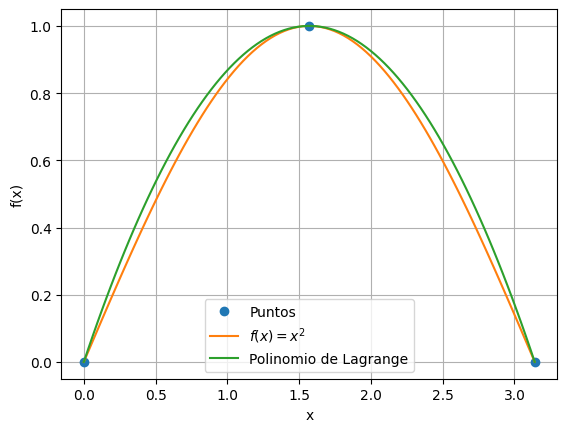

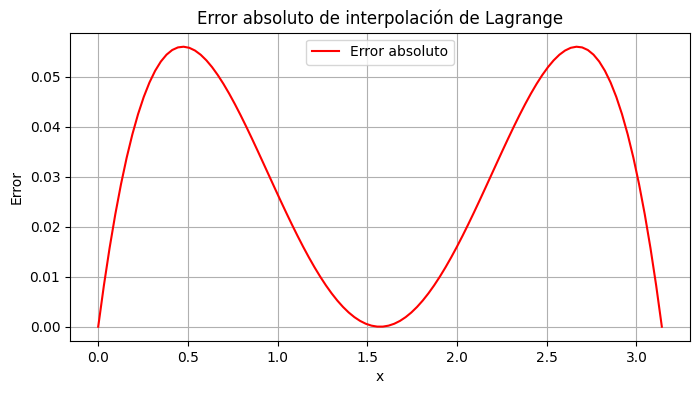

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, cos, sin, expand, lambdify, factorial
def Lagrange(x, y, x_interp):
  if len(x) != len(y):
    raise ValueError('x e y deben tener la misma longitud')
  if min(x) > min(x_interp) or max(x) < max(x_interp):
    raise ValueError('x_interp debe estar entre x')

  n = len(x)
  P = 0
  for i in range(n):
    l = 1
    for j in range(n):
      if i != j:
        l *= (x_interp - x[j]) / (x[i] - x[j])
    P += y[i] * l
  return P
x = np.array([0, (np.pi)/2, np.pi])
y = np.array([0, 1, 0])

f = lambda x: np.sin(x)

x_interp = np.linspace(min(x), max(x), 100)

y_interp = Lagrange(x, y, x_interp)

plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_interp, f(x_interp), '-', label='$f(x) = x^2$')
plt.plot(x_interp, y_interp, '-', label='Polinomio de Lagrange')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

error_abs = np.abs(f(x_interp) - y_interp)

plt.figure(figsize=(8, 4))
plt.plot(x_interp, error_abs, color='red', label='Error absoluto')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error absoluto de interpolación de Lagrange')
plt.grid()
plt.legend()
plt.show()

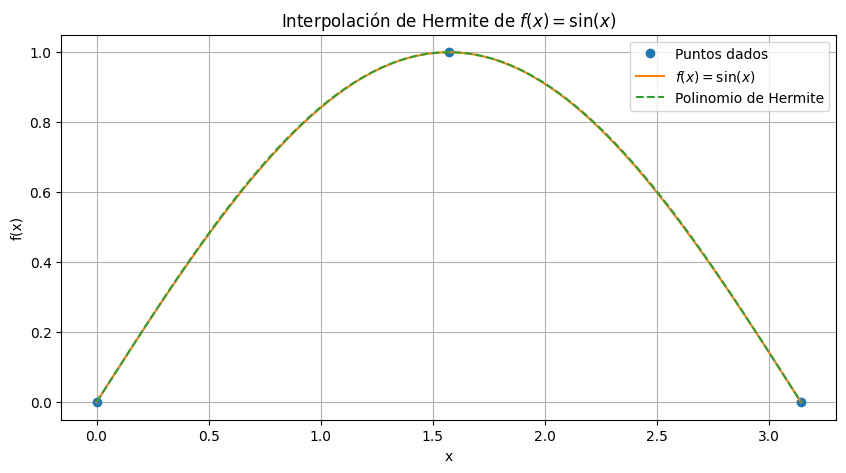

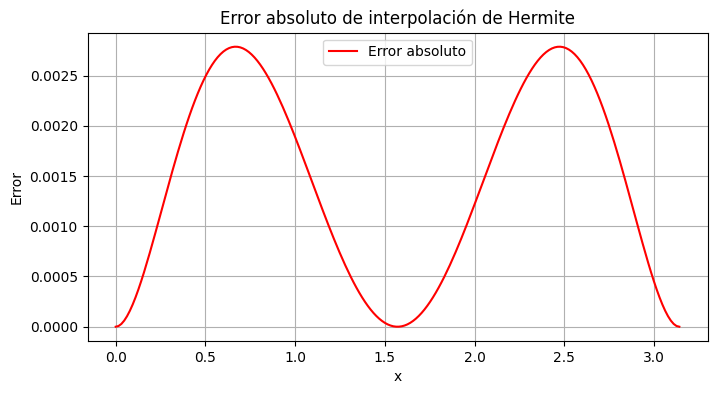

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def hermite_interpolation(x_points, y_points, derivatives):
    x = sp.symbols('x')
    n = len(x_points)
    H = 0

    for i in range(n):
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])

        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])

        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]

        H += term1 + term2

    return sp.simplify(H)

f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

x_points = np.array([0, np.pi/2, np.pi])
y_points = f(x_points)
dy_points = df(x_points)

hermite_poly = hermite_interpolation(x_points, y_points, dy_points)
hermite_func = sp.lambdify(sp.symbols('x'), hermite_poly, 'numpy')

x_interp = np.linspace(min(x_points), max(x_points), 200)
y_interp = hermite_func(x_interp)


plt.figure(figsize=(10, 5))
plt.plot(x_points, y_points, 'o', label='Puntos dados')
plt.plot(x_interp, f(x_interp), '-', label=r'$f(x) = \sin(x)$')
plt.plot(x_interp, y_interp, '--', label='Polinomio de Hermite')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Hermite de $f(x) = \sin(x)$')
plt.legend()
plt.grid()
plt.show()

error_abs = np.abs(f(x_interp) - y_interp)

plt.figure(figsize=(8, 4))
plt.plot(x_interp, error_abs, color='red', label='Error absoluto')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error absoluto de interpolación de Hermite')
plt.grid()
plt.legend()
plt.show()


2.

Máximo error de Lagrange: 37.30140876753765
Máximo error de Newton:   37.30140876753764
Máximo error de Hermite:  98.72547489182219


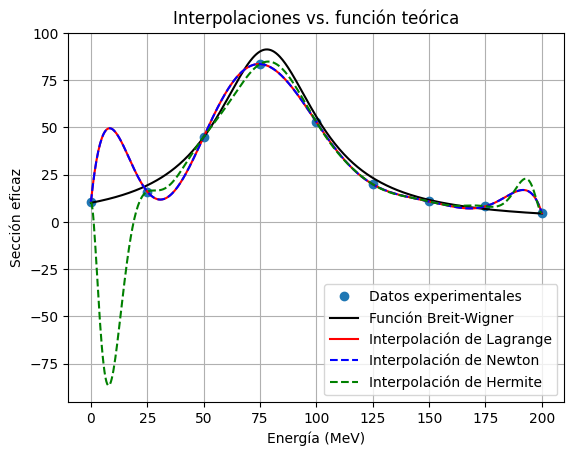

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

E = 78
gamma = 55
sigma0 = 69000
f = lambda x: sigma0 / ((x - E)**2 + (gamma)**2 / 4)

def Lagrange(x, y, x_interp):
    if len(x) != len(y):
        raise ValueError('x e y deben tener la misma longitud')
    n = len(x)
    P = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i != j:
                l *= (x_interp - x[j]) / (x[i] - x[j])
        P += y[i] * l
    return P

def diferencia_dividida(x, y, i, j):
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
    coef = coeficientes_a(x, y)
    def P(x_val):
        resultado = coef[0]
        producto = 1
        for i in range(1, len(x)):
            producto *= (x_val - x[i - 1])
            resultado += coef[i] * producto
        return resultado
    return P

def hermite_interpolation(x_points, y_points, derivatives):
    x = sp.symbols('x')
    n = len(x_points)
    H = 0
    for i in range(n):
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])
        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]
        H += term1 + term2
    return sp.simplify(H)

x_sp = sp.symbols('x')
f_sp = sigma0 / ((x_sp - E)**2 + (gamma**2) / 4)
f_deriv_sp = sp.diff(f_sp, x_sp)
f_deriv_np = sp.lambdify(x_sp, f_deriv_sp, 'numpy')
f_np = sp.lambdify(x_sp, f_sp, 'numpy')
dy = f_deriv_np(x)

x_plot = np.linspace(min(x), max(x), 500)
y_lagrange = np.array([Lagrange(x, y, xi) for xi in x_plot])
P_newton = Polinomio_Newton(x, y)
y_newton = np.array([P_newton(xi) for xi in x_plot])
hermite_poly = hermite_interpolation(x, y, dy)
hermite_func = sp.lambdify(x_sp, hermite_poly, 'numpy')
y_hermite = hermite_func(x_plot)
y_true = f_np(x_plot)

error_lagrange = np.abs(y_lagrange - y_true)
error_newton = np.abs(y_newton - y_true)
error_hermite = np.abs(y_hermite - y_true)

print("Máximo error de Lagrange:", np.max(error_lagrange))
print("Máximo error de Newton:  ", np.max(error_newton))
print("Máximo error de Hermite: ", np.max(error_hermite))

plt.plot(x, y, 'o', label='Datos experimentales')
plt.plot(x_plot, y_true, 'k-', label='Función Breit-Wigner')
plt.plot(x_plot, y_lagrange, 'r', label='Interpolación de Lagrange')
plt.plot(x_plot, y_newton, 'b--', label='Interpolación de Newton')
plt.plot(x_plot, y_hermite, 'g--', label='Interpolación de Hermite')
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz')
plt.legend()
plt.grid()
plt.title('Interpolaciones vs. función teórica')
plt.show()


3.

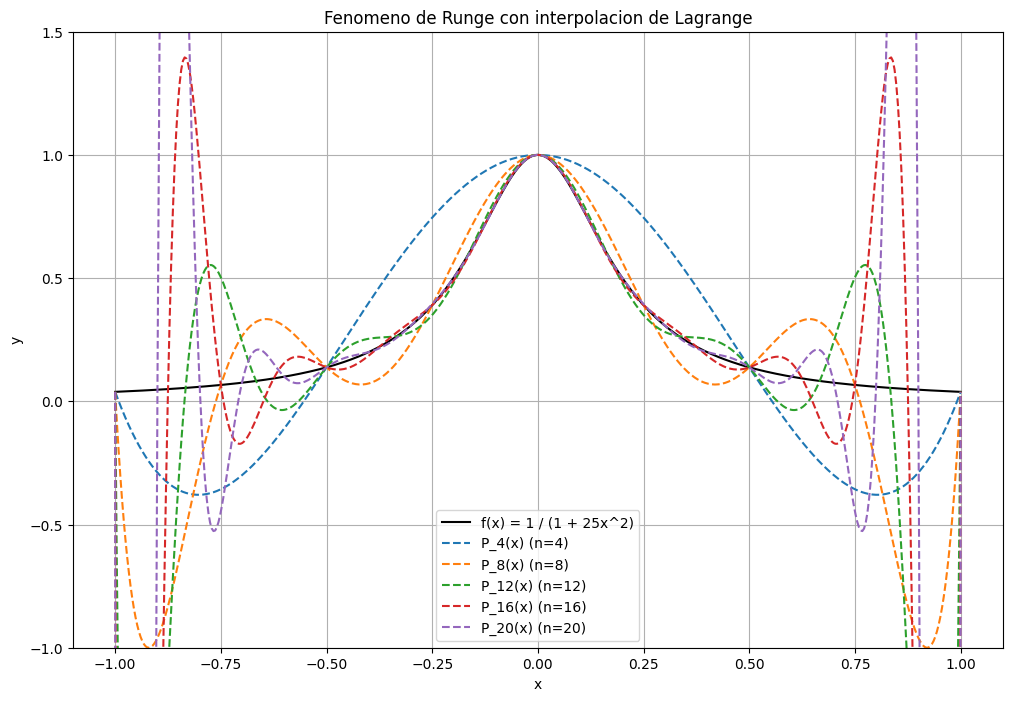

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def f(x):
    return 1 / (1 + 25 * x**2)

def Lagrange_single(x_nodes, y_nodes, x_interp):
    n = len(x_nodes)
    P = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i != j:
                l *= (x_interp - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        P += y_nodes[i] * l
    return P

def Lagrange_poly(x_nodes, y_nodes, x_range):
    return np.array([Lagrange_single(x_nodes, y_nodes, xi) for xi in x_range])

a, b = -1, 1
x_plot = np.linspace(a, b, 500)
f_plot = f(x_plot)

ns = [4, 8, 12, 16, 20]

plt.figure(figsize=(12, 8))
plt.plot(x_plot, f_plot, label='f(x) = 1 / (1 + 25x^2)', color='black')

for n in ns:
    x_nodes = np.linspace(a, b, n + 1)
    y_nodes = f(x_nodes)
    P_n_plot = Lagrange_poly(x_nodes, y_nodes, x_plot)
    plt.plot(x_plot, P_n_plot, label=f'P_{n}(x) (n={n})', linestyle='--')

plt.title('Fenomeno de Runge con interpolacion de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-1,1.5)
plt.show()


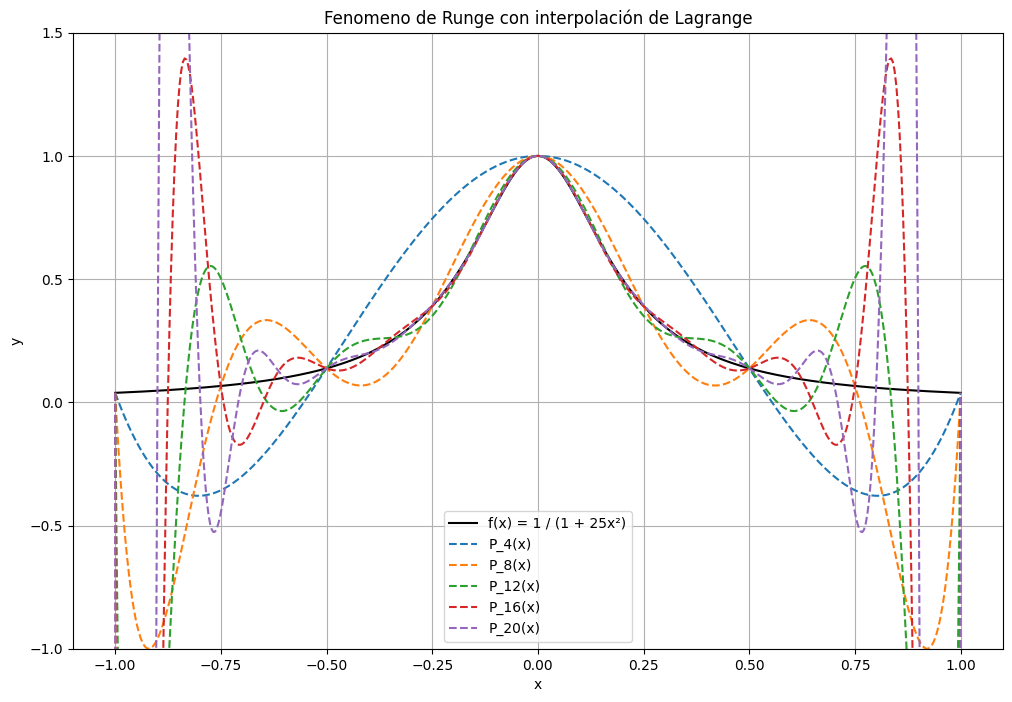

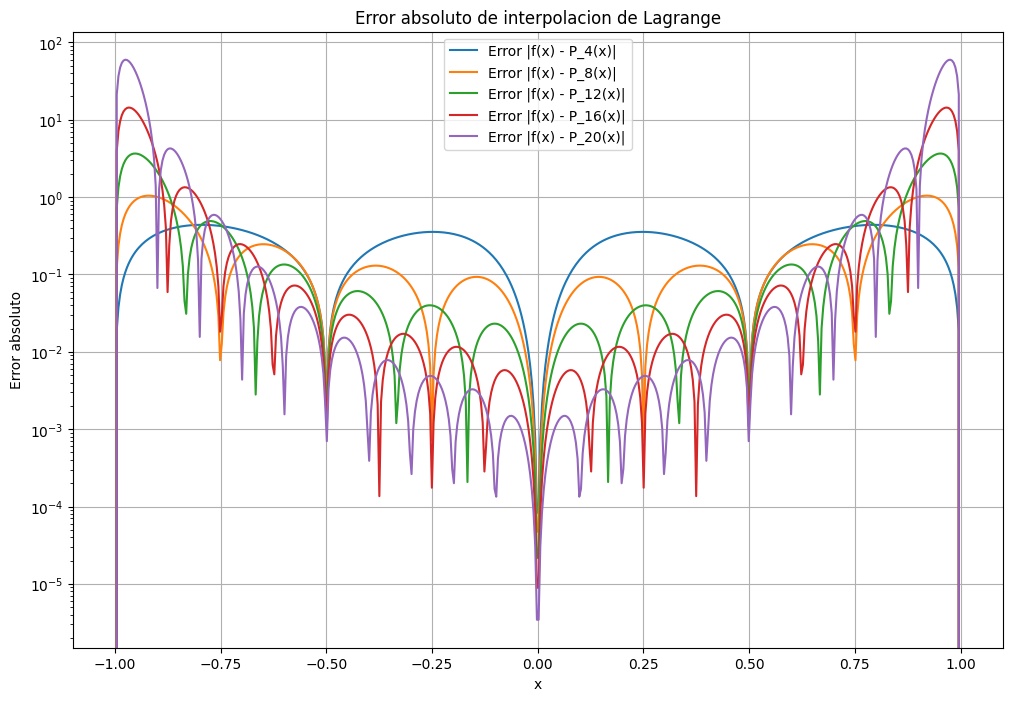

Derivada quinta simplificada:
Maximo estimado en [-1,1]: 3.1388e+05
Producto de (x - x_i) en x=0.5: -0.0000e+00
Cota del error en x = 0.5: 0.0000e+00


In [18]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
def f(x):
    return 1 / (1 + 25 * x**2)

def lagrange_punto(nodos_x, nodos_y, x_interp):
    n = len(nodos_x)
    P = 0
    for i in range(n):
        termino = 1
        for j in range(n):
            if i != j:
                termino *= (x_interp - nodos_x[j]) / (nodos_x[i] - nodos_x[j])
        P += nodos_y[i] * termino
    return P

def lagrange_polinomio(nodos_x, nodos_y, puntos):
    return np.array([lagrange_punto(nodos_x, nodos_y, xi) for xi in puntos])

a, b = -1, 1
x_grafica = np.linspace(a, b, 500)
f_grafica = f(x_grafica)

grados = [4, 8, 12, 16, 20]
plt.figure(figsize=(12, 8))
plt.plot(x_grafica, f_grafica, label='f(x) = 1 / (1 + 25x²)', color='black')

for n in grados:
    nodos_x = np.linspace(a, b, n + 1)
    nodos_y = f(nodos_x)
    P_n_grafica = lagrange_polinomio(nodos_x, nodos_y, x_grafica)
    plt.plot(x_grafica, P_n_grafica, label=f'P_{n}(x)', linestyle='--')

plt.title('Fenomeno de Runge con interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-1, 1.5)
plt.show()

plt.figure(figsize=(12, 8))
for n in grados:
    nodos_x = np.linspace(a, b, n + 1)
    nodos_y = f(nodos_x)
    P_n_valores = lagrange_polinomio(nodos_x, nodos_y, x_grafica)
    error = np.abs(f_grafica - P_n_valores)
    plt.plot(x_grafica, error, label=f'Error |f(x) - P_{n}(x)|')

plt.title('Error absoluto de interpolacion de Lagrange')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

x = sp.symbols('x')
f_sym = 1 / (1 + 25 * x**2)

f_5 = sp.diff(f_sym, x, 5)
f_5_simpl = sp.simplify(f_5)
print("Derivada quinta simplificada:")

n = 4
x_val = 0.5
nodos_x = np.linspace(a, b, n + 1)

producto = 1
for xi in nodos_x:
    producto *= (x - xi)

producto_eval = sp.lambdify(x, producto)(x_val)

f_5_func = sp.lambdify(x, f_5, 'numpy')
x_vals = np.linspace(-1, 1, 1000)
max_f5 = np.max(np.abs(f_5_func(x_vals)))

error_cota = max_f5 * abs(producto_eval) / math.factorial(n + 1)

print(f"Maximo estimado en [-1,1]: {max_f5:.4e}")
print(f"Producto de (x - x_i) en x=0.5: {producto_eval:.4e}")
print(f"Cota del error en x = 0.5: {error_cota:.4e}")


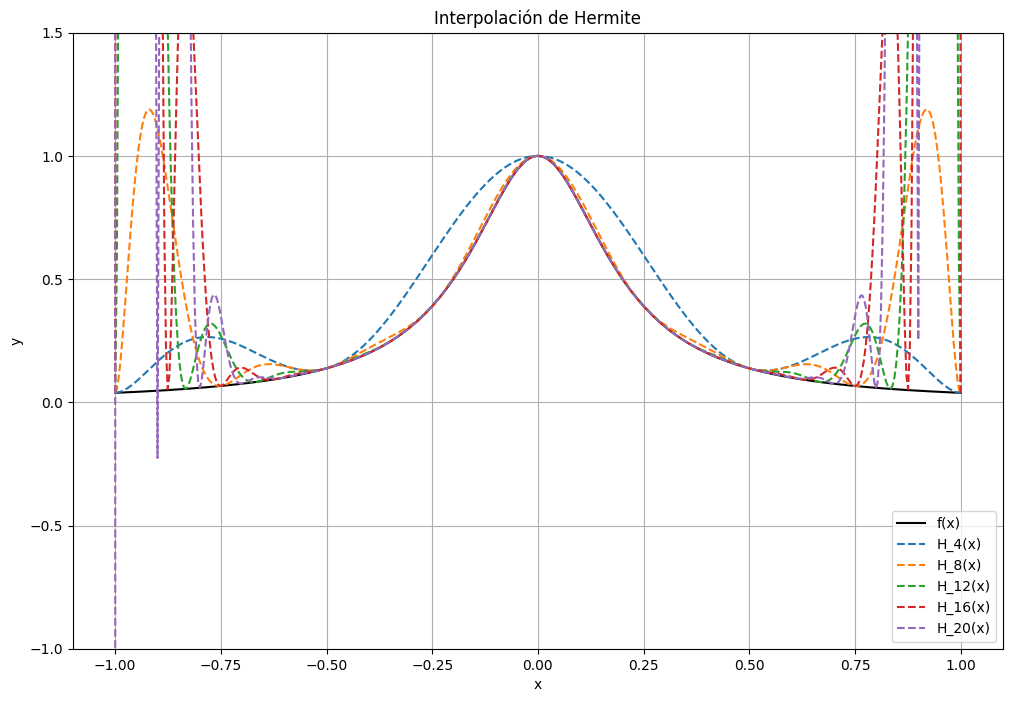

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def f(x):
    return 1 / (1 + 25 * x**2)

def df(x):
    return -50 * x / (1 + 25 * x**2)**2

def hermite_interpolation(x_points, y_points, derivatives):
    x = sp.symbols('x')
    n = len(x_points)
    H = 0

    for i in range(n):
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])
        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]
        H += term1 + term2

    return sp.simplify(H)

grados = [4, 8, 12, 16, 20]
a, b = -1, 1
x_vals_plot = np.linspace(a, b, 500)
f_vals_plot = f(x_vals_plot)
x = sp.symbols('x')

plt.figure(figsize=(12, 8))
plt.plot(x_vals_plot, f_vals_plot, label='f(x)', color='black')

for n in grados:
    nodos = np.linspace(a, b, n + 1)
    valores = f(nodos)
    derivadas = df(nodos)

    H_expr = hermite_interpolation(nodos.tolist(), valores.tolist(), derivadas.tolist())
    H_func = sp.lambdify(x, H_expr, 'numpy')
    H_vals = H_func(x_vals_plot)

    plt.plot(x_vals_plot, H_vals, linestyle='--', label=f'H_{n}(x)')

plt.title('Interpolación de Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.ylim(-1, 1.5)
plt.show()



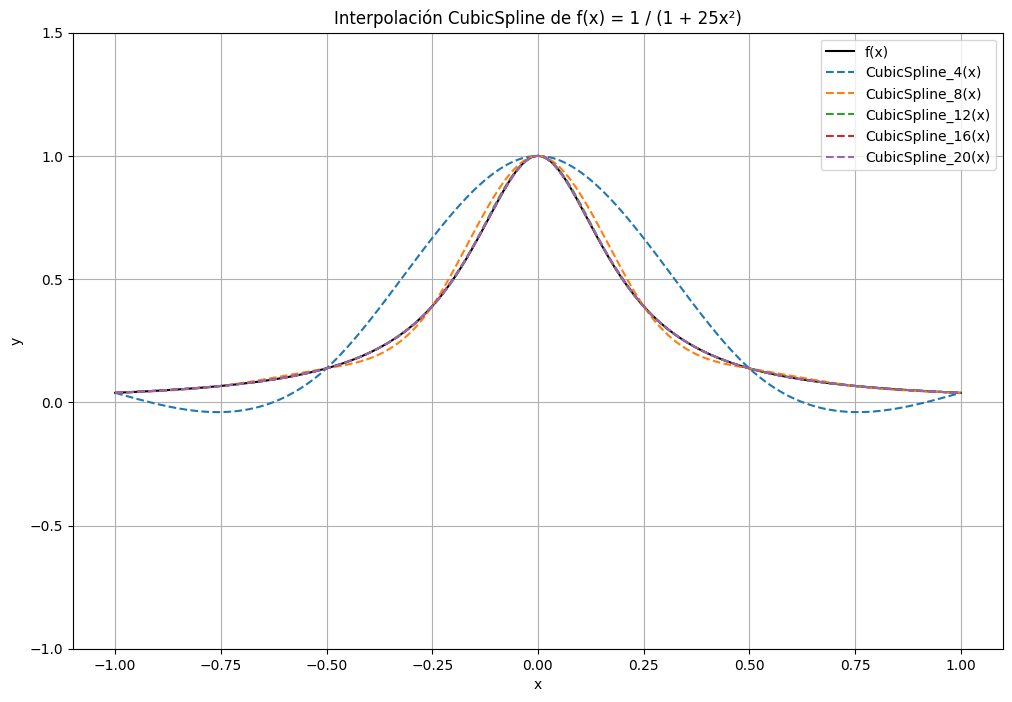

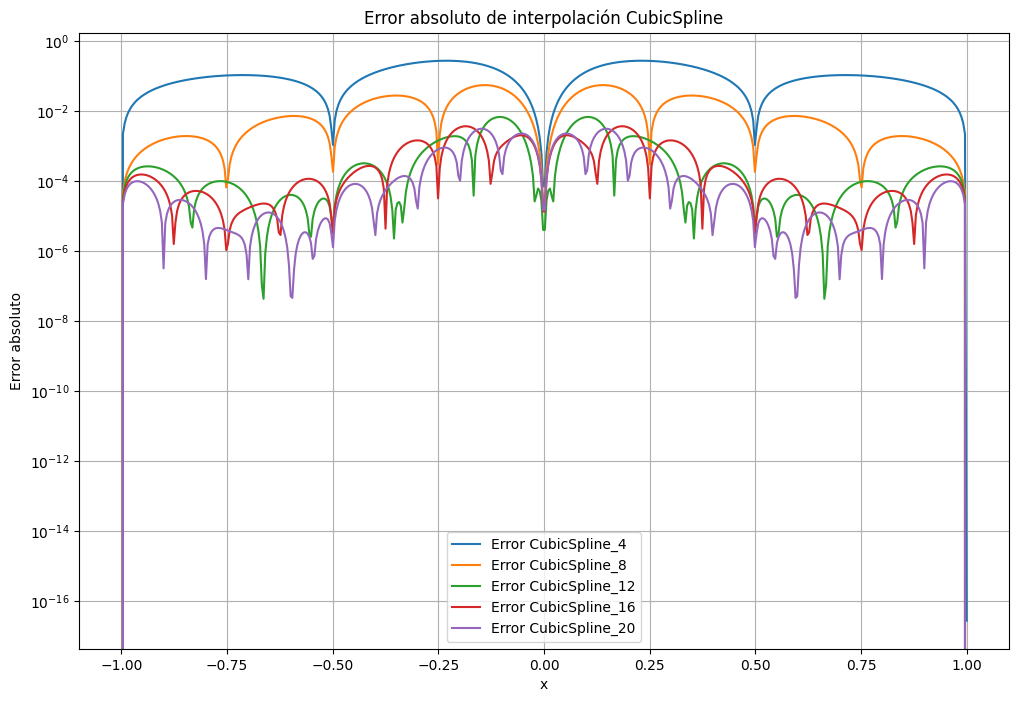

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def f(x):
    return 1 / (1 + 25 * x**2)

a, b = -1, 1
x_vals_plot = np.linspace(a, b, 500)
f_vals_plot = f(x_vals_plot)

grados = [4, 8, 12, 16, 20]

#Interpolación CubicSpline
plt.figure(figsize=(12, 8))
plt.plot(x_vals_plot, f_vals_plot, label='f(x)', color='black')

for n in grados:
    nodos = np.linspace(a, b, n + 1)
    valores = f(nodos)

    spline = CubicSpline(nodos, valores, bc_type='natural')  # spline natural
    spline_vals = spline(x_vals_plot)

    plt.plot(x_vals_plot, spline_vals, linestyle='--', label=f'CubicSpline_{n}(x)')

plt.title('Interpolación CubicSpline de f(x) = 1 / (1 + 25x²)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.ylim(-1, 1.5)
plt.show()

#Gráfica del error absoluto
plt.figure(figsize=(12, 8))

for n in grados:
    nodos = np.linspace(a, b, n + 1)
    valores = f(nodos)

    spline = CubicSpline(nodos, valores, bc_type='natural')
    spline_vals = spline(x_vals_plot)

    error = np.abs(f_vals_plot - spline_vals)
    plt.plot(x_vals_plot, error, label=f'Error CubicSpline_{n}')

plt.title('Error absoluto de interpolación CubicSpline')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


4.

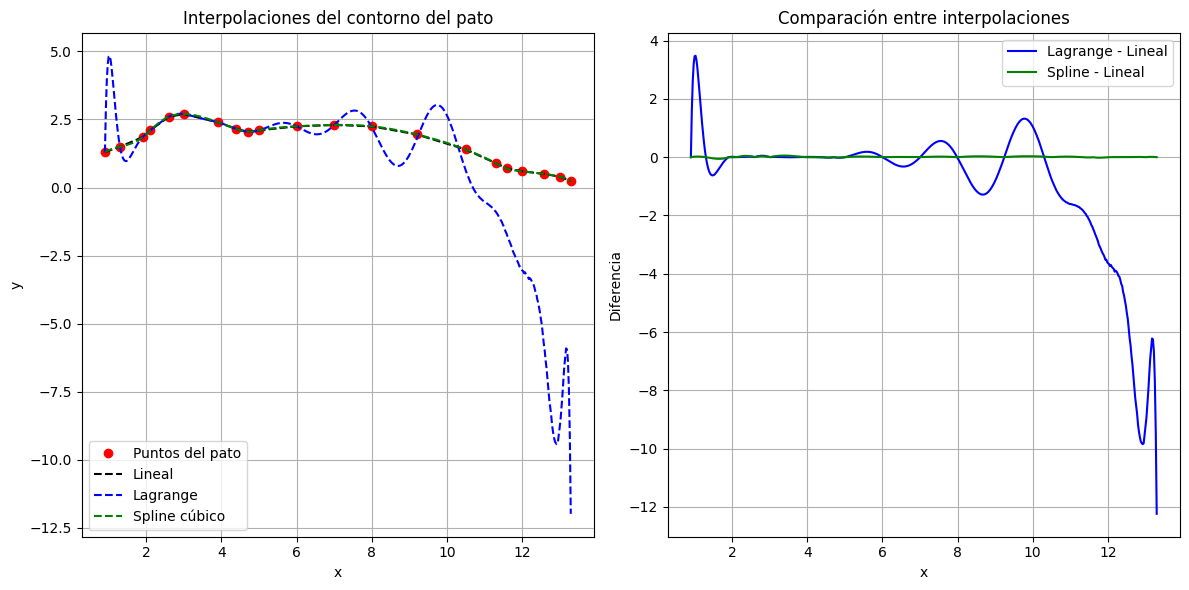

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sympy import symbols, simplify, lambdify

xp = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
yp = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

x_eval = np.linspace(min(xp), max(xp), 500)

y_lineal = np.interp(x_eval, xp, yp)

def lagrange_interp(x_data, y_data, x_interp):
    x = symbols('x')
    n = len(x_data)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - x_data[j]) / (x_data[i] - x_data[j])
        P += y_data[i] * L
    P = simplify(P)
    f_lagrange = lambdify(x, P, 'numpy')
    return f_lagrange(x_interp), P

y_lagrange, polinomio_lagrange = lagrange_interp(xp, yp, x_eval)

cs = CubicSpline(xp, yp)
y_spline = cs(x_eval)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(xp, yp, 'or', label='Puntos del pato')
plt.plot(x_eval, y_lineal, '--k', label='Lineal')
plt.plot(x_eval, y_lagrange, '--b', label='Lagrange')
plt.plot(x_eval, y_spline, '--g', label='Spline cúbico')
plt.title('Interpolaciones del contorno del pato')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_eval, y_lagrange - y_lineal, label='Lagrange - Lineal', color='blue')
plt.plot(x_eval, y_spline - y_lineal, label='Spline - Lineal', color='green')
plt.title('Comparacion entre interpolaciones')
plt.xlabel('x')
plt.ylabel('Diferencia')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


5

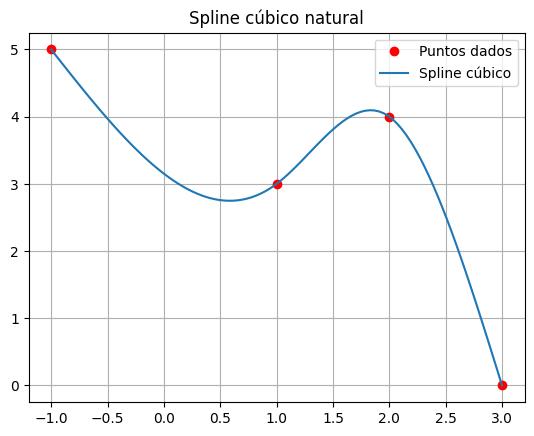

S(1.5) = 3.8098


In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([-1, 1, 2, 3])
y = np.array([5, 3, 4, 0])

spline = CubicSpline(x, y, bc_type='natural')

x_vals = np.linspace(-1, 3, 100)
y_vals = spline(x_vals)

plt.plot(x, y, 'ro', label='Puntos dados')
plt.plot(x_vals, y_vals, label='Spline cúbico')
plt.title("Spline cúbico natural")
plt.legend()
plt.grid(True)
plt.show()

print(f"S(1.5) = {spline(1.5):.4f}")
